In [1]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
# maplotlib.rcParams['font.family'] = 'AppleGothic Gothic   # Mac 사용자
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

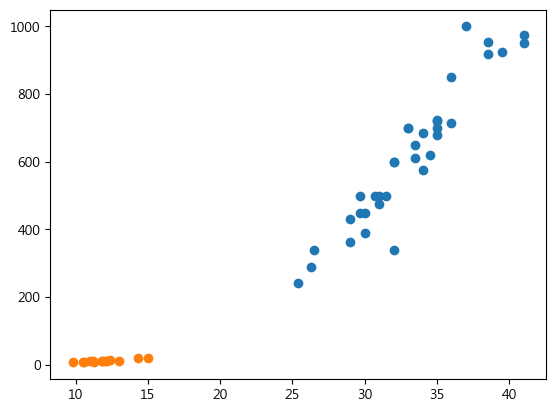

In [33]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)

# 분포도가 확연히 차이난다.

#----------------------------------------------------------------------------
1. 데이터 전처리

In [5]:
# 데이터의 전처리 과정을 해보세요!
# train_input, test_input, train_target, test_target

all_length = bream_length + smelt_length
len(all_length)  # 49개

all_weight = bream_weight + smelt_weight
len(all_weight)  # 49개

49

In [7]:
# zip() : 반복해서 각각 list 데이터를 1개씩 뽑아서 전달해줌
results = [1]*35 + [0]*14
datas = [ [l,w,r] for l,w,r in zip(all_length,all_weight,results)]
# datas

In [19]:
# list를 DataFrame으로 변환
df = pd.DataFrame(datas)
df.rename(columns={0:'length',1:'weight',2:'type'},inplace=True)
# df

In [20]:
# python random 함수 사용
index = np.arange(49)
np.random.shuffle(index)

In [23]:
train_input = df.iloc[index[:35],:-1]
train_target = df.iloc[index[:35],2]
test_input = df.iloc[index[35:],:-1]
test_target = df.iloc[index[35:],2]

2. 데이터 학습

In [26]:
clf = svm.SVC()
clf.fit(train_input,train_target)

SVC()

3. 데이터 예측하기

In [28]:
pre = clf.predict(test_input)
pre

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

4. 정확도(정답률) 계산

In [30]:
score = clf.score(test_input,test_target)
print("정확도 계산 : ",score)

정확도 계산 :  1.0
